In [1]:
subj = 'UI399'
root_dir = '/Users/alia/Documents/mandarin'

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from os.path import join, exists
from os import makedirs
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from sklearn.preprocessing import scale
import random
import librosa
from scipy import stats

In [3]:
# Create directories
fdir = root_dir + '/mandarin_ffr/fig/' + subj
odir = root_dir + '/output/' + subj

if not exists(fdir):
    makedirs(fdir)
if not exists(odir):
    makedirs(odir)

In [4]:
# Where are the data?
dir_data = ''.join([root_dir, '/', subj, '/data'])
file_ECoG = ''.join([dir_data, '/', subj, '_dat_clicks_block_8.mat'])
# file_ECoG = ''.join([dir_data, '/', subj, '_dat_FFR.mat'])

# Load the .mat file
f = h5py.File(file_ECoG, 'r')

# Read ECoG data
hg_stim = np.array(f['dat']['lfp']) # trial * tp * ch
time_axis = (np.round(f['dat']['time_axis'].value.flatten(), 3) * 1000).astype(int) # Use int b/c float precision



# Import behav
behav = np.array(f['dat']['behav'])
    
f.close()


In [ ]:
elecs = [34,35,36,37,38,39]

In [ ]:
freq = [25,50,100,125,150,200]
rows = [1,7,13,19,25,31,37,43,49,55,61]
cols = [1,2,3,4,5,6]


In [ ]:
x = 1
fig = plt.figure(figsize = (50,70)) 
for e in elecs:
    for f in freq:
        if x == 7:
            x = 13
        if x == 19:
            x = 25
        if x == 31:
            x = 37
        if x == 43:
            x = 49
        if x == 55:
            x = 61

        plt.subplot(12,6,x)
        
        ## plot spectrum
        myidx = np.where(behav[1] == f)
        myhg = np.mean(hg_stim[myidx[0], :, e], axis = 0)
        myspec = np.fft.rfft(myhg[(time_axis >= 0) & (time_axis <= 150)], norm = 'ortho')
        plt.plot(np.linspace(0, 500, myspec.shape[0]), abs(myspec))
#         plt.xlim(10,40)
        if x in rows:
            plt.ylabel(e, fontsize=50)
        if x in cols:
            plt.title(str(f) + ' Hz',fontsize=50)
        x +=1

        plt.subplot(12,6,x+5)
        ## calculate spectrogram
        f,t, Sxx = signal.spectrogram(myhg, 1000, noverlap = 76, nperseg =90)
        plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
        
        
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

In [ ]:
hz = np.unique(behav[1])
behav[1][1]

## find amp and run t test

In [5]:
##run t-test for all elecs and all freq and all trials

frame = pd.DataFrame()
for elecs in range(256):
    AmpData = pd.DataFrame()
    AmpData['Trial'] = list(range(300))
    AmpData['Freq'] = behav[1]
    AmpData['Pre'] = np.zeros(300)
    AmpData['Post'] = np.zeros(300)
    for trials in range(300):

        PreStim = pd.DataFrame()
        myhgPre = hg_stim[trials,:,elecs]
        myspecPre = np.fft.rfft(myhgPre[(time_axis >= -200) & (time_axis <= 0)])
        PreStim['Freq'] = np.linspace(0, 500, myspecPre.shape[0])
        PreStim['y'] = abs(myspecPre)
        T = behav[1][trials]

        freq = np.where(PreStim['Freq'] == T)
        F = freq[0][0]

        AmpData['Pre'][trials] = PreStim['y'][F]

        PostStim = pd.DataFrame()
        myhgPost = hg_stim[trials,:,15]
        myspecPost = np.fft.rfft(myhgPost[(time_axis >= 0) & (time_axis <= 200)])
        PostStim['Freq'] = np.linspace(0, 500, myspecPost.shape[0])
        PostStim['y'] = abs(myspecPost)
        AmpData['Post'][trials] = PostStim['y'][F]

    Amp25 = AmpData[AmpData.Freq == 25.0]
    Amp25 = Amp25.reset_index()

    Amp50 = AmpData[AmpData.Freq == 50.0]
    Amp50 = Amp50.reset_index()

    Amp100 = AmpData[AmpData.Freq == 100.0]
    Amp100 = Amp100.reset_index()

    Amp125 = AmpData[AmpData.Freq == 125.0]
    Amp125 = Amp125.reset_index()

    Amp150 = AmpData[AmpData.Freq == 150.0]
    Amp150 = Amp150.reset_index()

    Amp200 = AmpData[AmpData.Freq == 200.0]
    Amp200 = Amp200.reset_index()


    dfs = [Amp25, Amp50, Amp100, Amp125, Amp150, Amp200]
    stat = []
    pvalue = []

    Stats = pd.DataFrame()
    Stats['elec'] = [elecs,elecs,elecs,elecs,elecs,elecs]
    for d in dfs:
        s= stats.ttest_rel(d['Post'], d['Pre'])
        stat.append(s[0])
        pvalue.append(s[1])

    a = [25,50,100,125,150,200]

    Stats['Freq'] = a
    Stats['stat'] = stat
    Stats['pvalue'] = pvalue
    
    frame = frame.append(Stats)
    
    

/Users/alia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
frame.to_csv('all_stats_post_pre.csv')

In [44]:
topstats25 = frame25.nsmallest(5,'pvalue')
topstats50 = frame50.nsmallest(5,'pvalue')
topstats100 = frame100.nsmallest(5,'pvalue')
topstats125 = frame125.nsmallest(5,'pvalue')
topstats150 = frame150.nsmallest(5,'pvalue')
topstats200 = frame200.nsmallest(5,'pvalue')

In [47]:
topstats = pd.DataFrame()
lists = [topstats25, topstats50, topstats100, topstats125, topstats150, topstats200]
for s in lists: 
    topstats = topstats.append(s)
topstats


,index,elec,Freq,stat,pvalue
185,0,185,25,9.204048,2.933380e-12
120,0,120,25,9.171006,3.283459e-12
87,0,87,25,9.078773,4.500629e-12
94,0,94,25,8.730573,1.491620e-11
74,0,74,25,8.657962,1.917902e-11
140,1,140,50,10.741917,1.773654e-14
0,1,0,50,10.306338,7.323094e-14
169,1,169,50,10.234544,9.272079e-14
193,1,193,50,9.820871,3.655596e-13
186,1,186,50,9.746811,4.683320e-13


In [48]:
topstats.to_csv('topstats.csv')

In [40]:
## look at top 5 t-stats
frame25 = frame[frame.Freq == 25.0]
frame25 = frame25.reset_index()

frame50 = frame[frame.Freq == 50.0]
frame50 = frame50.reset_index()

frame100 = frame[frame.Freq == 100.0]
frame100 = frame100.reset_index()

frame125 = frame[frame.Freq == 125.0]
frame125 = frame125.reset_index()

frame150 = frame[frame.Freq == 150.0]
frame150 = frame150.reset_index()

frame200 = frame[frame.Freq == 200.0]
frame200 = frame200.reset_index()

In [ ]:
Amp25 = AmpData[AmpData.Freq == 25.0]
Amp25 = Amp25.reset_index()

Amp50 = AmpData[AmpData.Freq == 50.0]
Amp50 = Amp50.reset_index()

Amp100 = AmpData[AmpData.Freq == 100.0]
Amp100 = Amp100.reset_index()

Amp125 = AmpData[AmpData.Freq == 125.0]
Amp125 = Amp125.reset_index()

Amp150 = AmpData[AmpData.Freq == 150.0]
Amp150 = Amp150.reset_index()

Amp200 = AmpData[AmpData.Freq == 200.0]
Amp200 = Amp200.reset_index()


stats.ttest_rel(Amp25['Pre'], Amp25['Post'])
        

In [ ]:
from scipy import stats

dfs = [Amp25, Amp50, Amp100, Amp125, Amp150, Amp200]
stat = []
pvalue = []

Stats = pd.DataFrame()

for d in dfs:
    s= stats.ttest_rel(d['Pre'], d['Post'])
    stat.append(s[0])
    pvalue.append(s[1])

a = [25,50,100,125,150,200]
    
Stats['Freq'] = a
Stats['stat'] = stat
Stats['pvalue'] = pvalue

In [ ]:
Stats.to_csv('Ttest_stats.csv')

In [ ]:
myidx = np.where(behav[1] == 150)
myhg = np.mean(hg_stim[myidx[0], :, 15], axis = 0)
myspec = np.fft.rfft(myhg[(time_axis >= -200) & (time_axis <= 0)])
plt.plot(np.linspace(0, 500, myspec.shape[0]), abs(myspec), c = 'r', alpha = .5)
t = np.where(df['x'] == 150)
print(t)

myspec = np.fft.rfft(myhg[(time_axis >= 0) & (time_axis <= 200)])
plt.plot(np.linspace(0, 500, myspec.shape[0]), abs(myspec), c = 'b', alpha = .5)
a = abs(myspec)
t = np.where(abs(myspec) == max(abs(myspec)))
plt.plot(150,df['y'][30], marker = 'o')

plt.title('electrode 16 150hz')

plt.show()


In [ ]:
df = pd.DataFrame()
df['x'] = np.linspace(0, 500, myspec.shape[0])
len(df['x'])
df ['y'] = myspec

In [ ]:
df

### Block 10 English Syllable

In [ ]:
# Where are the data?
dir_data = ''.join([root_dir, '/', subj, '/data'])
file_ECoG = ''.join([dir_data, '/', subj, '_dat_clicks_block_10.mat'])
# file_ECoG = ''.join([dir_data, '/', subj, '_dat_FFR.mat'])

# Load the .mat file
f = h5py.File(file_ECoG, 'r')

# Read ECoG data
hg_stim = np.array(f['dat']['lfp']) # trial * tp * ch
time_axis = (np.round(f['dat']['time_axis'].value.flatten(), 3) * 1000).astype(int) # Use int b/c float precision



# Import behav
behav = np.array(f['dat']['behav'])
    
f.close()



/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


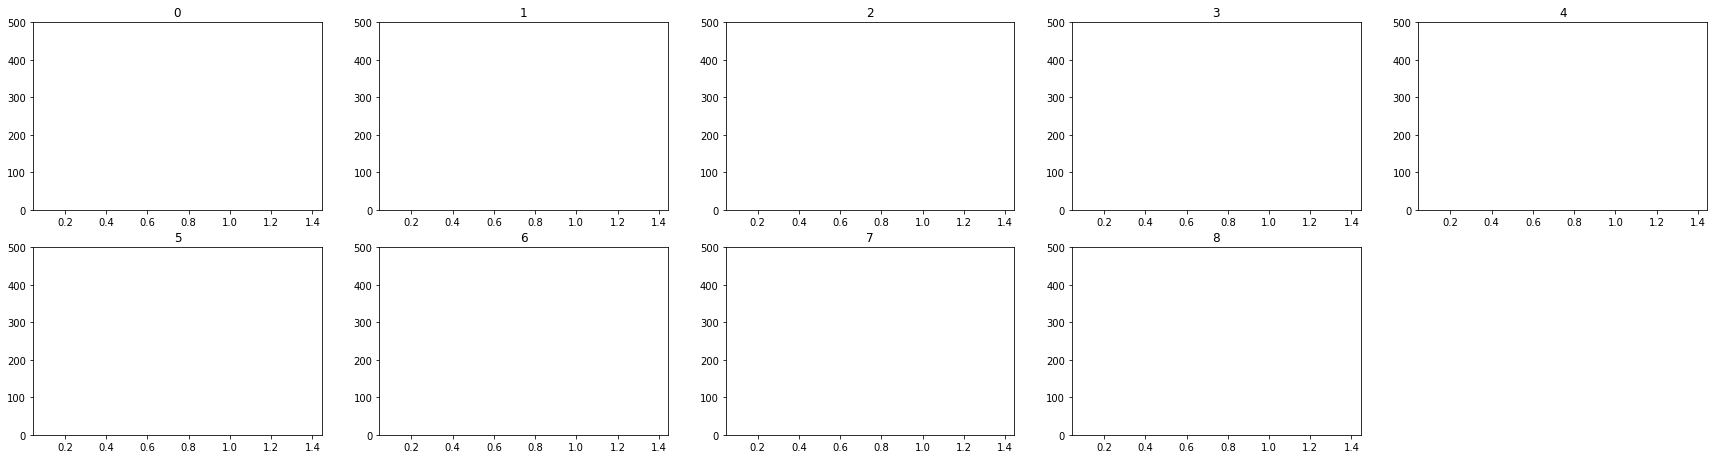

In [5]:
eng = list(range(9))
fig = plt.figure(figsize = (30,20)) 
x = 1
for e in eng:
    plt.subplot(5,5,x)
    myidx = np.where(behav[1] == e)
    myhg = np.mean(hg_stim[myidx[0], :, 15], axis = 0)
    f,t, Sxx = signal.spectrogram(myhg, 1000, noverlap = 76, nperseg =90)
    plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
    plt.title(e)
    x+=1
plt.show()

/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
/Users/alia/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


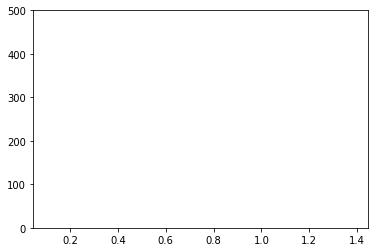

In [6]:
myidx = np.where(behav[1] == e)
myhg = np.mean(hg_stim[myidx[0], :, 15], axis = 0)
f,t, Sxx = signal.spectrogram(myhg, 1000, noverlap = 76, nperseg =90)
plt.pcolormesh(t,f,Sxx, vmax = np.percentile(Sxx.flatten(), 99.9))
plt.show()
